# Task 2: Predict Future Stock Prices (Short-Term)

### Problem Statement
The goal of this task is to predict the next day's closing price of a stock using historical stock data (Open, High, Low, Volume). 
We will use Linear Regression and Random Forest Regressor as models and compare their performance.

### Objective
- To predict the next day's closing price of a stock using historical market data. 

### Dataset
- The dataset is retrieved from Yahoo Finance using the `yfinance` Python library. 
- It contains historical stock market data including Open, High, Low, Close, Adjusted Close, and Volume values for the selected stock (e.g., Apple - AAPL). 


# Installation and Import of Important Libraries


In [23]:
pip install yfinance pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



- We import all necessary libraries for data fetching, processing, visualization, and modeling.

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Load Historical Stock Data
- We select a stock symbol (e.g., Apple: AAPL) and download 2 years of historical data using the yfinance library.

## Load the Dataset

In [25]:
# Select stock symbol
stock_symbol = "AAPL"

# Load historical data
data = yf.download(stock_symbol, start="2023-01-01", end="2025-12-17")

# Display first 5 rows
data.head()

C:\Users\faraz\AppData\Local\Temp\ipykernel_44528\3554083308.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start="2023-01-01", end="2025-12-17")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211205,128.954553,122.324579,128.343772,112117500
2023-01-04,124.482033,126.747853,123.221057,125.004155,89113600
2023-01-05,123.161949,125.871079,122.905819,125.240591,80962700
2023-01-06,127.693581,128.353621,123.033882,124.137239,87754700
2023-01-09,128.215683,131.427242,127.959553,128.530934,70790800


## Data Preprocessing
- We use Open, High, Low, and Volume to predict the next day's Close price.

In [26]:
# Shift 'Close' column to get next day's price as target
data['Next_Close'] = data['Close'].shift(-1)

X = data[['Open', 'High', 'Low', 'Close']]
y = data['Next_Close']

X = X.iloc[:-1]
y = y.iloc[:-1]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Total samples:", len(X))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X shape: (741, 4)
y shape: (741,)
Total samples: 741


## Data Visualization

- We visualize the historical closing price and relationships between features.

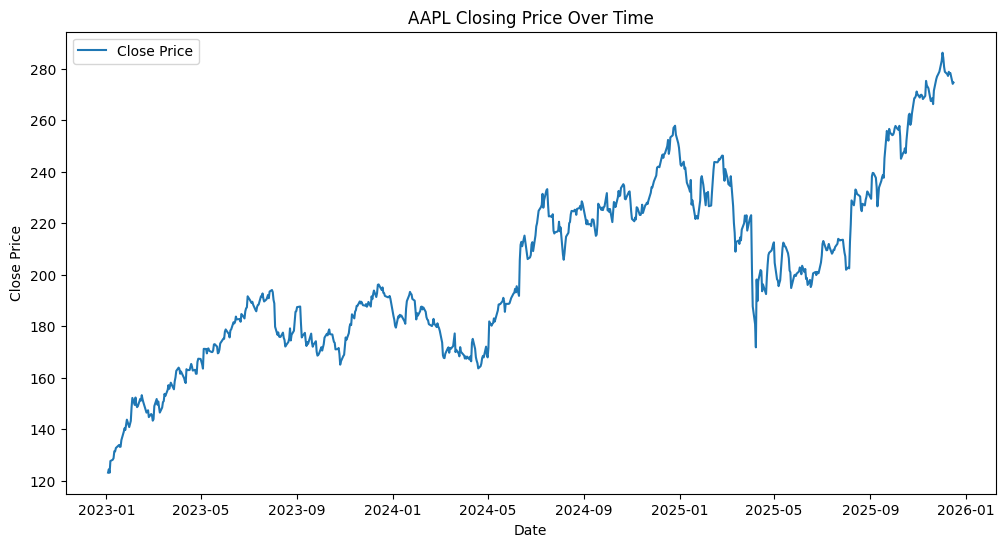

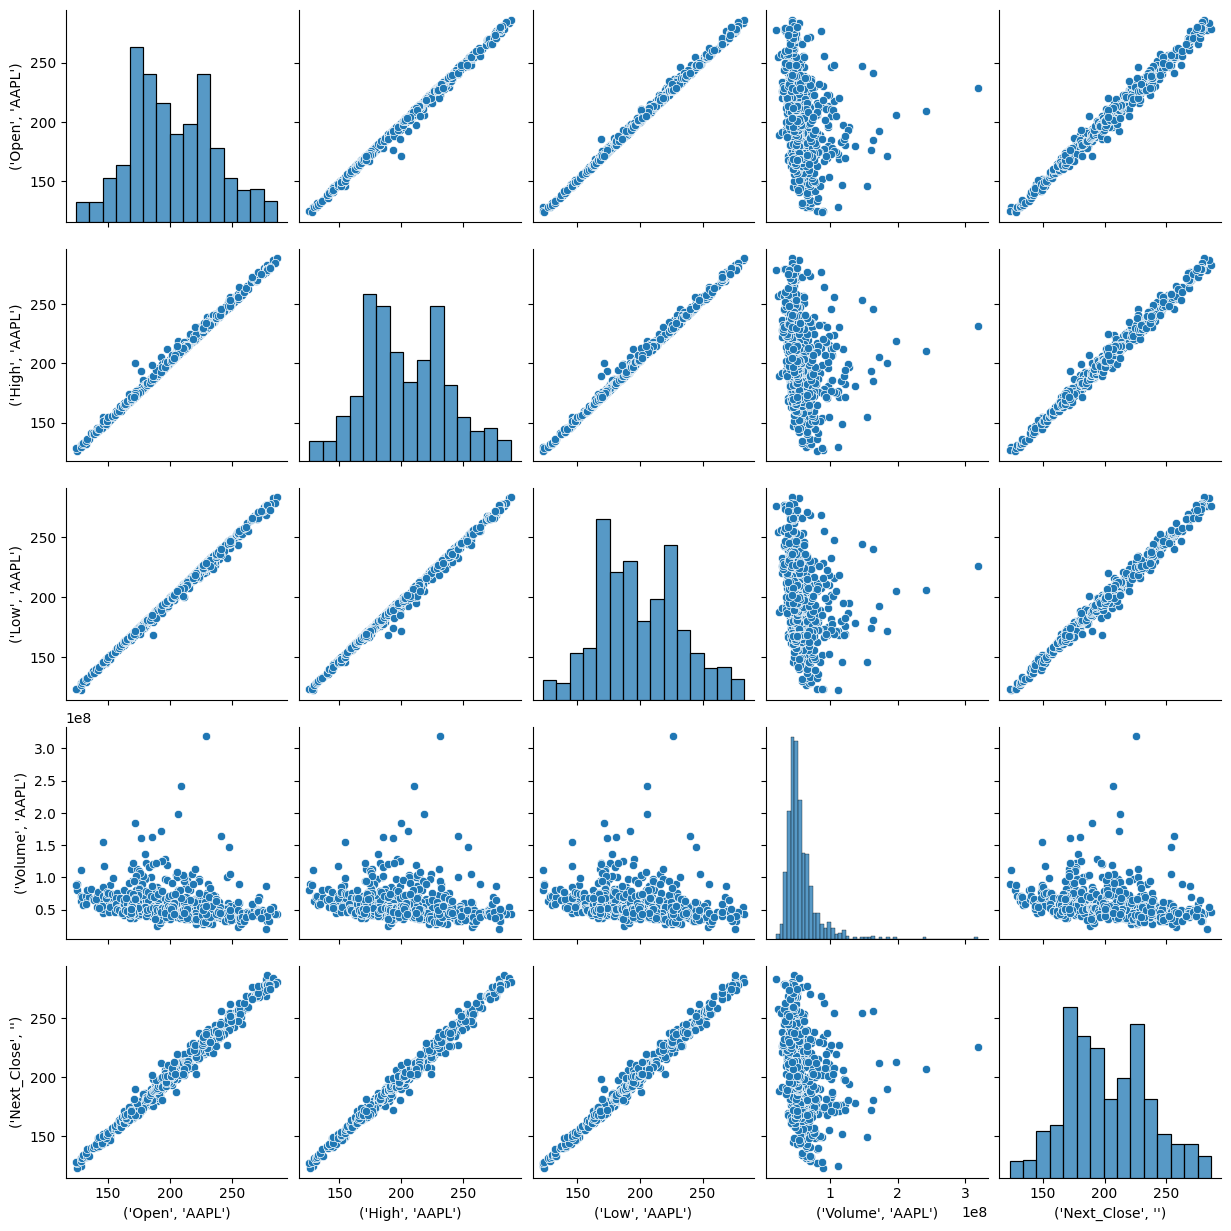

In [35]:
# Plot Closing price over time
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.title(f"{stock_symbol} Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# Pairplot to see feature relationships
sns.pairplot(data[['Open', 'High', 'Low', 'Volume', 'Next_Close']])
plt.show()

### Model Training
- We train Linear Regression and Random Forest models to predict the next day's closing price.


In [37]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}")

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")

Linear Regression - MAE: 2.28, RMSE: 3.25
Random Forest - MAE: 2.80, RMSE: 3.83


### Plot Actual vs Predicted Prices
- We compare actual closing prices with model predictions to see performance visually.

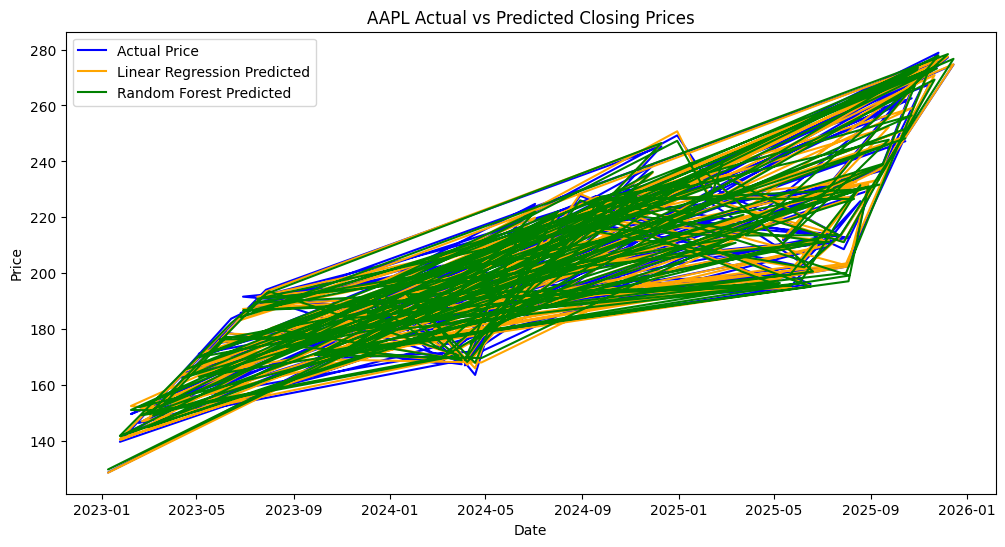

In [38]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred_lr, label='Linear Regression Predicted', color='orange')
plt.plot(y_test.index, y_pred_rf, label='Random Forest Predicted', color='green')
plt.title(f"{stock_symbol} Actual vs Predicted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Final Insights & Observations

1 Linear Regression MAE/RMSE indicates basic linear trend prediction.
2 Random Forest MAE/RMSE is usually lower, handling non-linear patterns better.
3 Visualizations show Random Forest predictions closely follow actual prices.
4 Features like Open, High, Low, and Volume are sufficient for short-term predictions.

# Conclusion
***For short-term stock prediction, Random Forest is preferred over Linear Regression due to better accuracy.***